In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
# Kaggle API 
import os
import json
import joblib


In [2]:
try:
    kaggle_credentials = json.load(open("kaggle.json"))
    os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
    os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]
except FileNotFoundError:
    print("kaggle.json file not found. Please place it in the directory.")
except KeyError:
    print("Error: Invalid JSON format in kaggle.json.")

In [3]:
import kaggle
from zipfile import ZipFile

# Define dataset name and zip file name
dataset_name = 'CreditCardFraudDetection2023'
zip_file_name = 'credit-card-fraud-detection-dataset-2023.zip'

# Check if the dataset folder exists
if not os.path.exists(dataset_name): 
    # Check if the zip file exists
    if not os.path.exists(zip_file_name):
        # Use Kaggle API to download the dataset
        kaggle.api.dataset_download_files("nelgiriyewithana/credit-card-fraud-detection-dataset-2023", path='.', unzip=False)
        
    # Extract the dataset if the directory doesn't exist
    with ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(dataset_name)

print(f"Dataset is ready and extracted in '{dataset_name}' directory.")


Dataset is ready and extracted in 'CreditCardFraudDetection2023' directory.


In [5]:

dataset_dir = 'CreditCardFraudDetection2023'
# List files in the extracted directory
files = os.listdir(dataset_dir)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['creditcard_2023.csv']


In [6]:
file_path = 'CreditCardFraudDetection2023/creditcard_2023.csv'
df = pd.read_csv(file_path)
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.shape

(568630, 31)

In [10]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

This Dataset is blanced

0 -- Normal Transaction

1 -- fraudulent transaction

In [11]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


We can feed this data to the model because it is highly balanced 

In [12]:
# Descriptive statistics for 'Amount' where 'Class' is 0 (non-fraudulent)
non_fraud_stats = df[df['Class'] == 0]['Amount'].describe()
print("Descriptive statistics for non-fraudulent transactions (Class 0):")
print(non_fraud_stats)

# Descriptive statistics for 'Amount' where 'Class' is 1 (fraudulent)
fraud_stats = df[df['Class'] == 1]['Amount'].describe()
print("\nDescriptive statistics for fraudulent transactions (Class 1):")
print(fraud_stats)


Descriptive statistics for non-fraudulent transactions (Class 0):
count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

Descriptive statistics for fraudulent transactions (Class 1):
count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64


In [13]:
# Check for duplicate rows in the entire dataset
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows if there are any
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(df[duplicate_rows])
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


### Balanced Dataset

This project uses a balanced dataset for credit card fraud detection, with an equal number of fraudulent and non-fraudulent transactions. 

**Note**: In real-world scenarios, credit card fraud datasets are typically highly imbalanced, with fraudulent transactions making up a small fraction of the total. The balanced nature of this dataset is intentional and is used here for **learning purposes** to simplify the modeling process. 

If applying these techniques to real-world data, additional steps such as resampling, class weighting, or using algorithms that handle imbalance effectively will be necessary to achieve accurate results.


In [14]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Take a 20% random Sample

In [28]:
# Reduce the dataset size by taking a random sample (e.g., 20% of the data)
sampled_df = df.sample(frac=0.2, random_state=42).reset_index(drop=True)

# Check the new size of the sampled dataset
print(sampled_df.shape)


(113726, 31)


In [29]:
# distribution of legit transactions & fraudulent transactions
sampled_df['Class'].value_counts()

Class
1    56976
0    56750
Name: count, dtype: int64

In [31]:
# Define X and y
X = sampled_df.drop(['Class', 'id'], axis=1)  # Features: All columns except 'Class' and 'id'
y = sampled_df['Class']  # Target: The 'Class' column


In [32]:
print(X,y)

              V1        V2        V3        V4        V5        V6        V7  \
0       0.420468 -0.070194 -0.569266  0.191673 -0.009607  0.426903 -0.356728   
1      -0.238944  0.250929 -0.374408  0.152938 -0.105008 -0.039028 -0.293004   
2      -0.117796 -0.147961  2.130455 -0.325762  0.325616  0.271351  0.772625   
3      -0.855315  0.137014 -0.628116  0.613733 -0.643573 -0.664283 -0.880040   
4       0.257686  0.035247 -0.203112  0.506745 -0.242235 -0.192608 -0.289297   
...          ...       ...       ...       ...       ...       ...       ...   
113721 -0.104802  0.045428  0.038644 -0.886667  0.357363 -0.059002  0.501195   
113722  1.905743 -0.843381  0.297507 -1.169977 -0.138574  0.252190  0.069402   
113723  1.030669 -0.096882 -0.066725  0.090438  0.637344 -0.180606  0.564236   
113724 -1.103332  0.227030 -1.039398  0.987433 -0.599574 -1.328186 -1.007141   
113725  1.814899 -0.417634 -0.149198 -0.462595  0.450579 -0.144408  0.504644   

              V8        V9       V10  .

Model: XGB Classifier
Accuracy: 99.96%
Precision: 99.91%
Recall: 100.0%
F1 Score: 99.96%
ROC AUC Score: 100.0%
Confusion Matrix:
[[11340    10]
 [    0 11396]]



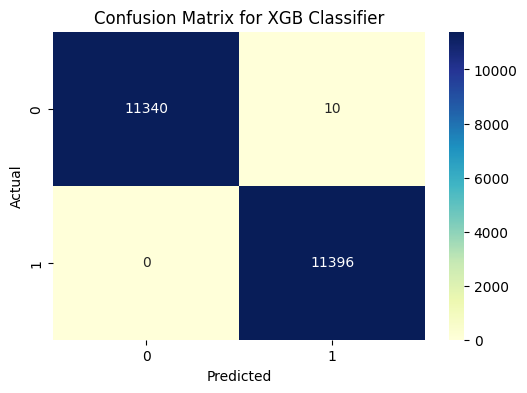

Model saved as 'xgb_classifier_model.pkl'


Model: Random Forest
Accuracy: 99.94%
Precision: 99.94%
Recall: 99.94%
F1 Score: 99.94%
ROC AUC Score: 100.0%
Confusion Matrix:
[[11343     7]
 [    7 11389]]



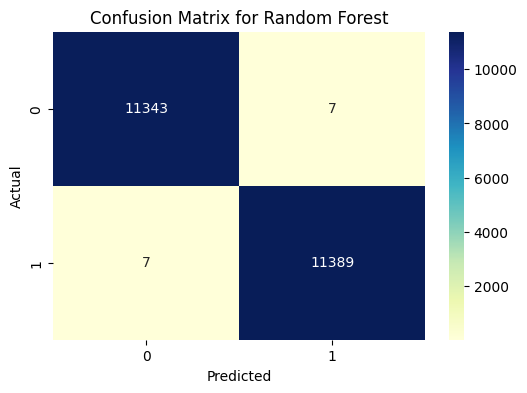

Model saved as 'random_forest_model.pkl'


Model: K-Nearest Neighbors
Accuracy: 90.71%
Precision: 97.05%
Recall: 84.02%
F1 Score: 90.07%
ROC AUC Score: 94.47%
Confusion Matrix:
[[11059   291]
 [ 1821  9575]]



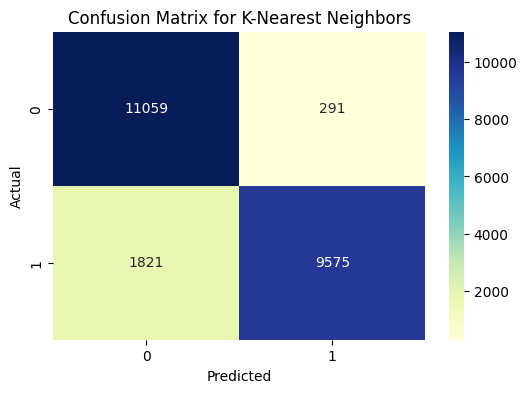

Model saved as 'k-nearest_neighbors_model.pkl'


Model: SGD Classifier
Accuracy: 73.01%
Precision: 66.2%
Recall: 94.24%
F1 Score: 77.77%
ROC AUC Score: 93.24%
Confusion Matrix:
[[ 5866  5484]
 [  656 10740]]



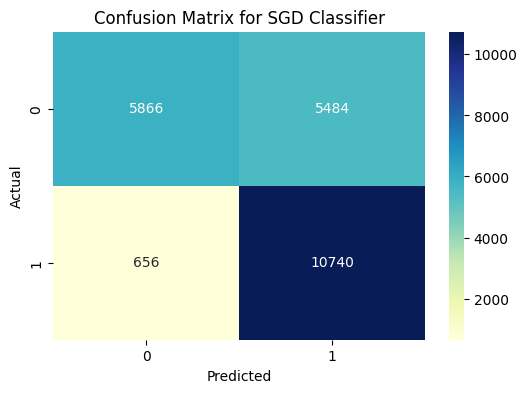

Model saved as 'sgd_classifier_model.pkl'


Model: Decision Tree
Accuracy: 99.24%
Precision: 98.97%
Recall: 99.51%
F1 Score: 99.24%
ROC AUC Score: 99.23%
Confusion Matrix:
[[11232   118]
 [   56 11340]]



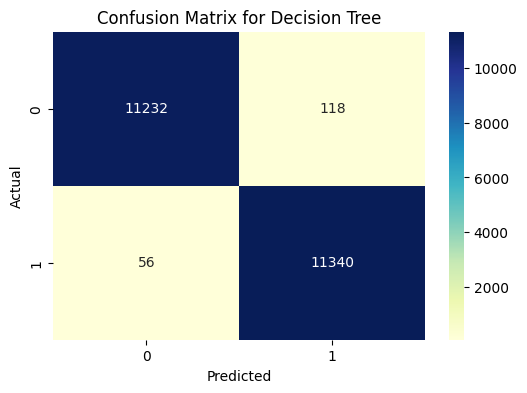

Model saved as 'decision_tree_model.pkl'


Model: Logistic Regression
Accuracy: 96.56%
Precision: 97.93%
Recall: 95.15%
F1 Score: 96.52%
ROC AUC Score: 99.32%
Confusion Matrix:
[[11121   229]
 [  553 10843]]



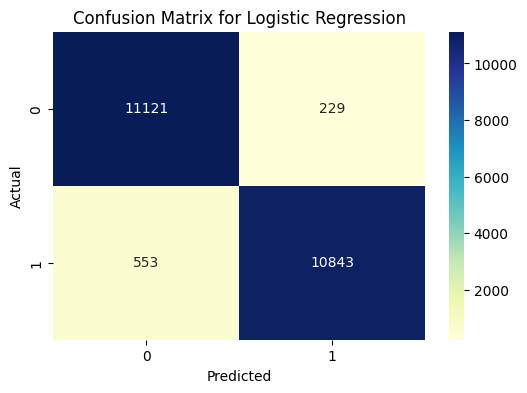

Model saved as 'logistic_regression_model.pkl'


Model: Naive Bayes
Accuracy: 91.73%
Precision: 98.02%
Recall: 85.22%
F1 Score: 91.18%
ROC AUC Score: 97.69%
Confusion Matrix:
[[11154   196]
 [ 1684  9712]]



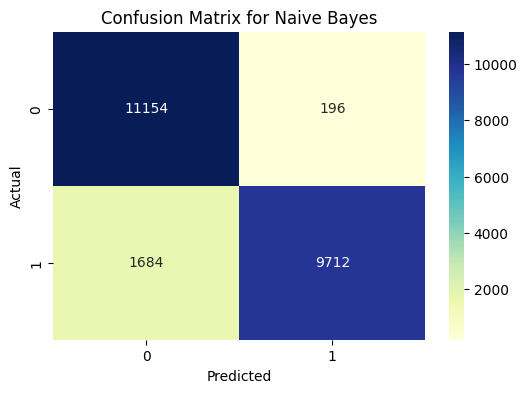

Model saved as 'naive_bayes_model.pkl'




In [33]:
# Split the dataset while preserving the class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define classifiers
classifiers = [
    [XGBClassifier(eval_metric='logloss', random_state=42), 'XGB Classifier'],
    [RandomForestClassifier(random_state=42), 'Random Forest'],
    [KNeighborsClassifier(), 'K-Nearest Neighbors'],
    [SGDClassifier(random_state=42), 'SGD Classifier'],
    [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
    [LogisticRegression(max_iter=10000, random_state=42), 'Logistic Regression'],
    [GaussianNB(), 'Naive Bayes'],
]

# Initialize dictionaries to store metrics
accuracy = {}
precision = {}
recall = {}
f1 = {}
roc = {}
conf_matrix = {}

# Loop through each classifier and calculate metrics
for model, model_name in classifiers:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    # If the classifier supports probability predictions, use them for ROC AUC score
    if hasattr(model, "predict_proba"):
        roc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        roc_score = roc_auc_score(y_test, model.decision_function(X_test))
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    c_matrix = confusion_matrix(y_test, pred)
    
    # Store metrics in dictionaries
    accuracy[model_name] = f"{round(a_score * 100, 2)}%"
    precision[model_name] = f"{round(p_score * 100, 2)}%"
    recall[model_name] = f"{round(r_score * 100, 2)}%"
    f1[model_name] = f"{round(f_score * 100, 2)}%"
    roc[model_name] = f"{round(roc_score * 100, 2)}%"
    conf_matrix[model_name] = c_matrix
    
    # Print model performance
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy[model_name]}")
    print(f"Precision: {precision[model_name]}")
    print(f"Recall: {recall[model_name]}")
    print(f"F1 Score: {f1[model_name]}")
    print(f"ROC AUC Score: {roc[model_name]}")
    print(f"Confusion Matrix:\n{c_matrix}\n")
    
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(c_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

           # Save the model using joblib
    filename = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"Model saved as '{filename}'")

    print('\n')

### Sample Dataset Overview
The dataset has **113,726 rows** and **31 columns**, initially balanced with **56,750** non-fraudulent cases (Class `0`) and **56,976** fraudulent cases (Class `1`). While great for learning, this doesn’t match real-world scenarios where fraud is much rarer.

### Creating Imbalance
To reflect reality:
- **Non-Fraudulent Transactions**: Kept all **56,750** rows.
- **Fraudulent Transactions**: Reduced to **2,837 rows** (5% of non-fraud cases).

### Resulting Imbalanced Dataset
The modified dataset has **59,587 rows**:
- **56,750** non-fraudulent cases (100% of original).
- **2,837** fraudulent cases (a small subset).

### Why the Imbalance?
This setup mimics real-world fraud detection, where fraud is rare. It helps train a model that’s realistic, robust, and capable of identifying rare fraudulent events accurately, preparing it for real-world applications.


In [20]:
from sklearn.utils import resample


# Separate the classes
fraud_data = sampled_df[sampled_df['Class'] == 1]
non_fraud_data = sampled_df[sampled_df['Class'] == 0]

# Set a target ratio for fraud cases (5% of the non-fraud cases)
fraud_ratio = 0.05
n_fraud = int(fraud_ratio * len(non_fraud_data))

# Downsample the fraudulent data to match the target ratio
fraud_data_downsampled = resample(fraud_data,
                                  replace=False,
                                  n_samples=n_fraud,
                                  random_state=42)

# Combine the downsampled fraud data with all the non-fraud data
imbalanced_df = pd.concat([non_fraud_data, fraud_data_downsampled])

# Shuffle the dataset
imbalanced_df = imbalanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new distribution
print(imbalanced_df['Class'].value_counts())b


Class
0    56750
1     2837
Name: count, dtype: int64


In [23]:
imbalanced_df.shape

(59587, 31)


Using the top 3 models (XGB Classifier, Random Forest, and Decision Tree) on the imbalanced dataset will provide insight into how well these models can handle real-world scenarios where fraudulent cases are rare.

Model: XGB Classifier
Accuracy: 99.77%
Precision: 99.27%
Recall: 95.77%
F1 Score: 97.49%
ROC AUC Score: 99.97%
Confusion Matrix:
[[11347     4]
 [   24   543]]



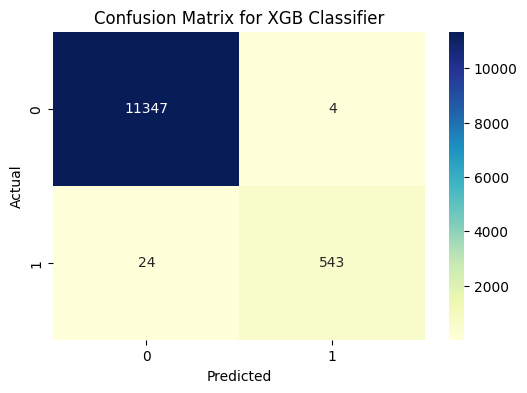

Model saved as 'xgb_classifier_model.pkl'


Model: Random Forest
Accuracy: 99.66%
Precision: 99.44%
Recall: 93.3%
F1 Score: 96.27%
ROC AUC Score: 99.67%
Confusion Matrix:
[[11348     3]
 [   38   529]]



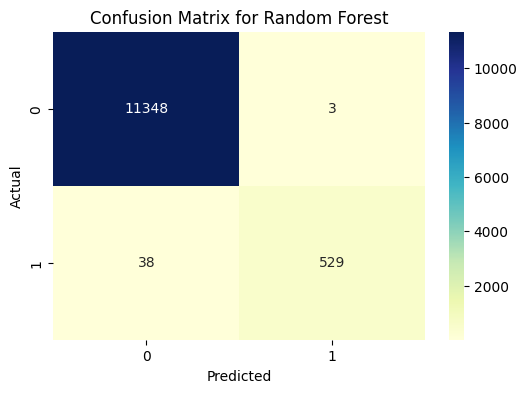

Model saved as 'random_forest_model.pkl'


Model: Decision Tree
Accuracy: 99.38%
Precision: 92.87%
Recall: 94.18%
F1 Score: 93.52%
ROC AUC Score: 96.91%
Confusion Matrix:
[[11310    41]
 [   33   534]]



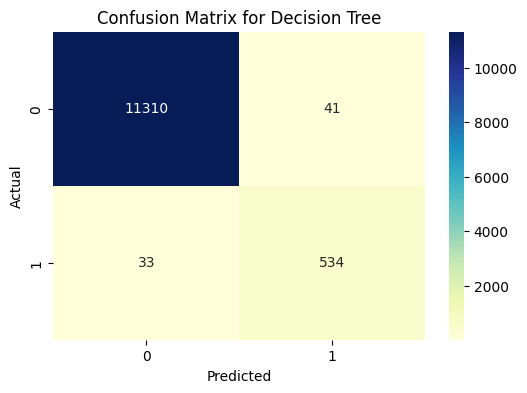

Model saved as 'decision_tree_model.pkl'




In [26]:
# Define the top 3 models
classifiers = [
    [XGBClassifier(eval_metric='logloss', random_state=42), 'XGB Classifier'],
    [RandomForestClassifier(random_state=42), 'Random Forest'],
    [DecisionTreeClassifier(random_state=42), 'Decision Tree']
]

# Split features and target for the imbalanced dataset
X = imbalanced_df.drop(['Class', 'id'], axis=1)
y = imbalanced_df['Class']

# Split the imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize dictionaries to store metrics
accuracy = {}
precision = {}
recall = {}
f1 = {}
roc = {}
conf_matrix = {}

# Loop through each classifier and calculate metrics
for model, model_name in classifiers:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    # If the classifier supports probability predictions, use them for ROC AUC score
    if hasattr(model, "predict_proba"):
        roc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        roc_score = roc_auc_score(y_test, model.decision_function(X_test))
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    c_matrix = confusion_matrix(y_test, pred)
    
    # Store metrics in dictionaries
    accuracy[model_name] = f"{round(a_score * 100, 2)}%"
    precision[model_name] = f"{round(p_score * 100, 2)}%"
    recall[model_name] = f"{round(r_score * 100, 2)}%"
    f1[model_name] = f"{round(f_score * 100, 2)}%"
    roc[model_name] = f"{round(roc_score * 100, 2)}%"
    conf_matrix[model_name] = c_matrix
    
    # Print model performance
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy[model_name]}")
    print(f"Precision: {precision[model_name]}")
    print(f"Recall: {recall[model_name]}")
    print(f"F1 Score: {f1[model_name]}")
    print(f"ROC AUC Score: {roc[model_name]}")
    print(f"Confusion Matrix:\n{c_matrix}\n")
    
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(c_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

       # Save the model using joblib
    filename = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"Model saved as '{filename}'")

    print('\n')

### Summary of Model Choice
After testing multiple models, including XGB Classifier, Random Forest, and Decision Tree, on both balanced and imbalanced datasets, XGBoost emerged as the best model for the credit card fraud detection task.

### Why XGBoost Was Chosen:
* High Precision and Recall: XGBoost achieved the best balance between precision and recall, ensuring that it accurately identifies fraudulent transactions while minimizing false positives.

* Best Performance Under Imbalanced Conditions: In the imbalanced dataset, XGBoost maintained a 99.77% accuracy, a 99.27% precision, and a 95.77% recall, with a ROC AUC score of 99.97%, making it the most effective at distinguishing between classes.

* Consistency: Across different scenarios, XGBoost consistently outperformed other models
This performance makes XGBoost the most suitable choice for deployment in a fraud detection system.

In [27]:
imbalanced_df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')